#### Hadi Heidari Rad - 810197011

# Part A
Extracting data from houses.csv using Pandas, removing unnecessary columns, and replacing NaNs with column's average:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv('houses.csv')
df = df.drop(columns= ['LotConfig', 'Neighborhood', 'Id'])
df = df.fillna(df.mean())
df.head()



,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,60,8450,7,65.0,5,3,8,856,2003,208.5
1,20,9600,6,80.0,8,3,6,1262,1976,181.5
2,60,11250,7,68.0,5,3,6,920,2001,223.5
3,70,9550,7,60.0,5,3,7,756,1915,140.0
4,60,14260,8,84.0,5,4,9,1145,2000,250.0


<br/>
<p> Plotting nine graphs where vertical axes are SalePrice and horizontal axes are respectively nine given numerical data: </p>

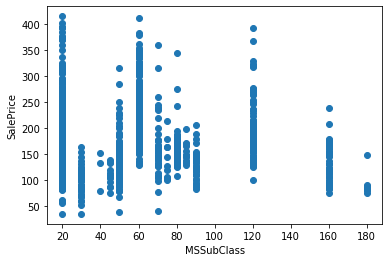

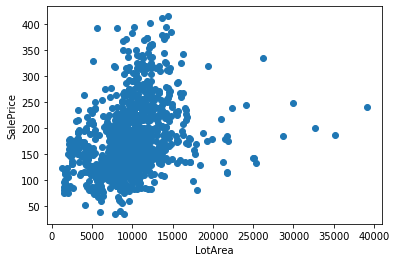

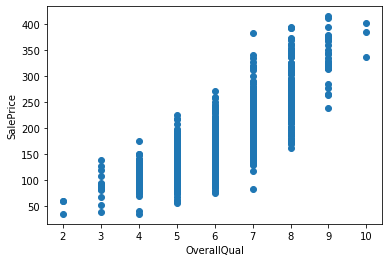

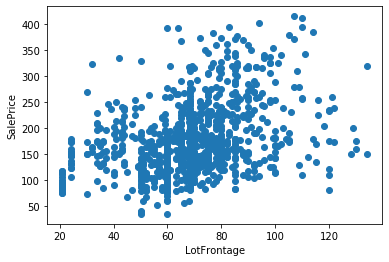

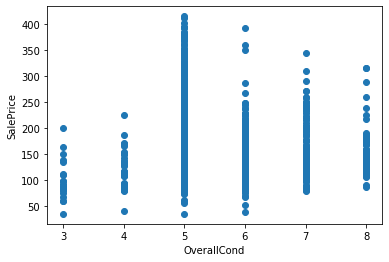

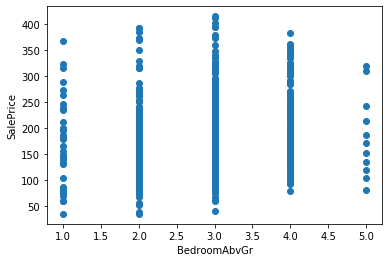

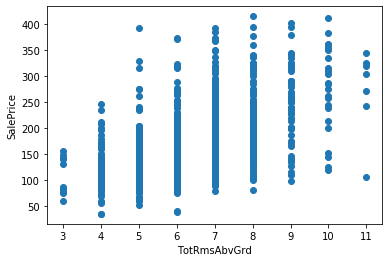

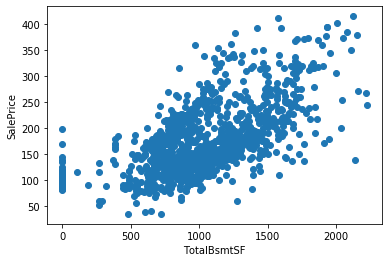

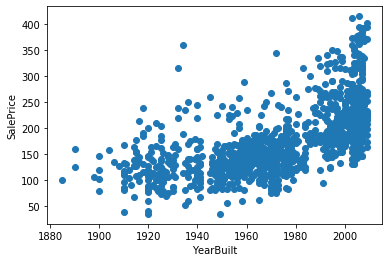

In [3]:
_SalePrice = df['SalePrice']
df_plot = df.drop(columns=['SalePrice'])
for col in df_plot.columns:
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.scatter(df_plot[col], _SalePrice)
    plt.show()

# Part B
Calculating RMSE using for loop (non-vectorized) and then plotting real and predicted prices by considering **OverallQual** feature (because it has the most similarity to a linear regression)

In [4]:
_SalePrice = df['SalePrice']
_OverallQual = df['OverallQual']
N = len(_OverallQual)

#non-vectorized
rmse = 0
for i in range (0 , N):
    tmp = ((_OverallQual[i]*40 - 60) - _SalePrice[i])**2
    rmse += tmp
    
rmse /= N
rmse = np.sqrt(rmse)

print('non-vectorized RMSE:', rmse)

non-vectorized RMSE: 39.348387680071006


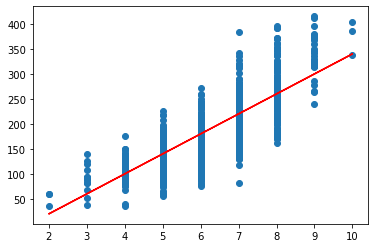

In [5]:
plt.scatter(_OverallQual, _SalePrice)
plt.plot(_OverallQual, (_OverallQual*40 - 60), color='red')

# Part D
Calculating RMSE in a vectorized algorithm using Numpy:

In [6]:

#vectorized:
rmse = 0

rmse = np.sqrt((np.sum(np.power(np.subtract((_OverallQual*40 - 60), _SalePrice), 2)))/N)
    
print('vectorized RMSE:', rmse)

vectorized RMSE: 39.348387680071006


# Part E
Writing knn function for predicting SalePrice using k-nearest neighbor method with k = 10
<br/>also notice that function gets input in dataframe format:

In [7]:
# for being tested indivisually:
#import numpy as np
#import pandas as pd


dataframe = pd.read_csv('houses.csv')
dataframe = dataframe.fillna(df.mean())
_SalePrice = dataframe['SalePrice']
dataframe = dataframe.drop(columns= ['LotConfig', 'Neighborhood', 'Id', 'SalePrice'])
    

def knn(house_data):
    global dataframe
    house_data_nor = (np.subtract(house_data, dataframe.min(axis = 0))) / (np.subtract(dataframe.max(axis = 0), dataframe.min(axis = 0)))
    dataframe_nor = (np.subtract(dataframe, dataframe.min(axis = 0))) / (np.subtract(dataframe.max(axis = 0), dataframe.min(axis = 0)))
    distances = np.sqrt(np.sum(np.power(np.subtract(dataframe_nor, house_data_nor), 2), axis = 1))
    dst_and_price = pd.concat([distances, _SalePrice], axis=1)
    return np.sum(dst_and_price.nsmallest(10, 0), axis = 0).iloc[1] / 10


columns = ['MSSubClass', 'LotArea', 'OverallQual', 'LotFrontage', 'OverallCond', 
           'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']

row_data = [70,11435,8,67.66037735849056,7,3,7,792,1929]

singular_df = pd.DataFrame(data = [row_data], columns = columns)

print('KNN prediction:', knn(singular_df))

KNN prediction: 173.51


#### plotting Real and KNN-Predicted sale prices besides OverallQual:

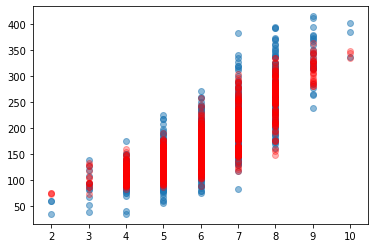

In [9]:
plt.scatter(_OverallQual, _SalePrice, alpha=0.5)
plt.scatter(_OverallQual, dataframe.apply(knn, axis=1), c='r', alpha=0.3)